# STOCK PRICE PREDICTION

### IMPORTING MODULES AND LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.layers import Input
import math
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from keras.layers import Bidirectional

## GATHERING DATA

collecting data using tiingo for google ans saving it as a CSV file

In [2]:
key="1ffb7772002d6f16bed86a174622df968700f417"
stock_data = pdr.get_data_tiingo('MSFT', api_key=key)
stock_data.to_csv('MSFT.csv')

C:\anaconda\envs\tensor\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


reading the data from the saved goog.csv

In [42]:
stocks_data=pd.read_csv('MSFT.csv')
stocks_data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,176.341991,178.093015,174.418365,176.318311,2.945157e+07,173.007573,174.728058,171.118099,172.984522,2.945157e+07,0.007989,1.0
std,79.043551,79.881292,78.135453,79.055122,1.299929e+07,80.153315,81.002817,79.233365,80.165298,1.299929e+07,0.063521,0.0
min,68.170000,68.780000,68.020000,68.255000,7.425503e+06,63.835067,64.406277,63.694606,63.914662,7.425503e+06,0.000000,1.0
25%,106.272500,107.582500,105.167500,106.325000,2.112136e+07,102.167389,103.240476,101.010022,102.181827,2.112136e+07,0.000000,1.0
50%,153.435000,155.480000,150.965000,151.980000,2.626938e+07,150.092341,151.998061,147.631744,148.699514,2.626938e+07,0.000000,1.0
75%,243.555000,245.262500,241.410000,243.600000,3.380413e+07,241.005333,242.131663,238.766032,240.667174,3.380413e+07,0.000000,1.0
max,343.110000,349.670000,342.200000,344.620000,1.112421e+08,341.567704,348.098217,340.661795,343.070917,1.112421e+08,0.620000,1.0


### Processing Data 

selecting dates and close Price

In [43]:
stocks_data=stocks_data[['date','close']]

method to covert string(date) to datatime(date)

In [44]:
def str_to_datetime(s):
  split = s.split('-')
  split[2] = split[2].split(' ')[0]
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [45]:
stocks_data['date'] = stocks_data['date'].apply(str_to_datetime)

setting date as INDEX

In [46]:
stocks_data.index=stocks_data['date']
stocks_data.pop('date')

date
2017-07-03   2017-07-03
2017-07-05   2017-07-05
2017-07-06   2017-07-06
2017-07-07   2017-07-07
2017-07-10   2017-07-10
                ...    
2022-06-24   2022-06-24
2022-06-27   2022-06-27
2022-06-28   2022-06-28
2022-06-29   2022-06-29
2022-06-30   2022-06-30
Name: date, Length: 1258, dtype: datetime64[ns]

In [47]:
stocks_data

,close
date,
2017-07-03,68.17
2017-07-05,69.08
2017-07-06,68.57
2017-07-07,69.46
2017-07-10,69.98
...,...
2022-06-24,267.70
2022-06-27,264.89
2022-06-28,256.48


#### Visualizing data of stocsk

Text(0, 0.5, 'STOCK PRICE')

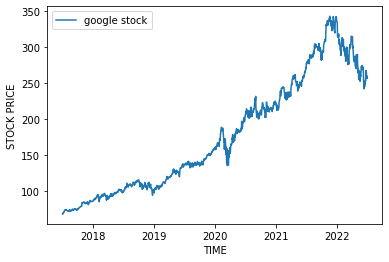

In [48]:
plt.plot(stocks_data)
plt.legend(['google stock'])
plt.xlabel("TIME")
plt.ylabel("STOCK PRICE")

creating dataset 'df1' and setting its value range from 0-1
reshaping it then into a 2D array

In [49]:
df1=stocks_data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [50]:
print(df1)

[[0.        ]
 [0.00330981]
 [0.00145486]
 ...
 [0.68491307]
 [0.69866153]
 [0.68618608]]


Compressed plot of stocks [range:0-1] 

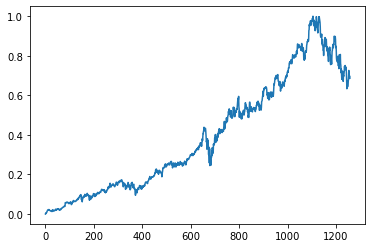

In [51]:
plt.plot(df1)

### Creating testing data and train data 

In [52]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size
train_dates=stocks_data.index[0:training_size]
test_dates=stocks_data.index[training_size:]

In [53]:
test_data

array([[0.63352004],
       [0.65796174],
       [0.65356078],
       [0.66098058],
       [0.67316505],
       [0.68262166],
       [0.68283989],
       [0.69222376],
       [0.681676  ],
       [0.69589729],
       [0.70040736],
       [0.69313305],
       [0.69138721],
       [0.69982542],
       [0.68742271],
       [0.7018986 ],
       [0.70335346],
       [0.70488106],
       [0.67792973],
       [0.67047356],
       [0.6692733 ],
       [0.66810941],
       [0.65330618],
       [0.64850513],
       [0.66036226],
       [0.6702917 ],
       [0.65108751],
       [0.64763221],
       [0.62133556],
       [0.63599331],
       [0.65461555],
       [0.6438132 ],
       [0.63617517],
       [0.63632065],
       [0.6485415 ],
       [0.64377682],
       [0.66418128],
       [0.6676002 ],
       [0.66676366],
       [0.65883465],
       [0.6601804 ],
       [0.65188768],
       [0.65152397],
       [0.64574089],
       [0.66421765],
       [0.67520186],
       [0.67069179],
       [0.674

### visualizing train and test data

Text(0, 0.5, 'STOCK PRICE')

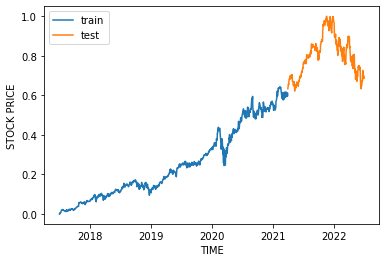

In [54]:
plt.plot(train_dates,train_data)
plt.plot(test_dates,test_data)
plt.legend(['train','test'])
plt.xlabel("TIME")
plt.ylabel("STOCK PRICE")

#### Method to convert an array of values into a dataset matrix

In [55]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

creating test and train dataset as well as target values of test and train

In [56]:
time_step = 10
x_train_data, target_train = create_dataset(train_data, time_step)
x_test_data, target_test = create_dataset(test_data, time_step)

In [57]:
print(x_train_data.shape), print(target_train.shape)

(932, 10)
(932,)


(None, None)

In [58]:
x_train_data[:2]

array([[0.        , 0.00330981, 0.00145486, 0.00469193, 0.00658325,
        0.00661963, 0.01083873, 0.01309377, 0.01676729, 0.01884047],
       [0.00330981, 0.00145486, 0.00469193, 0.00658325, 0.00661963,
        0.01083873, 0.01309377, 0.01676729, 0.01884047, 0.01865862]])

In [59]:
target_train[0:10]

array([0.01865862, 0.02069542, 0.0220048 , 0.02044082, 0.01974976,
       0.02189569, 0.02138648, 0.01814941, 0.01771296, 0.01647632])

reshaphing datasets to make it for our LSTM

In [60]:
x_train_data =x_train_data.reshape(x_train_data.shape[0],x_train_data.shape[1] , 1)
x_test_data = x_test_data.reshape(x_test_data.shape[0],x_test_data.shape[1] , 1)

In [61]:
x_train_data[:1]

array([[[0.        ],
        [0.00330981],
        [0.00145486],
        [0.00469193],
        [0.00658325],
        [0.00661963],
        [0.01083873],
        [0.01309377],
        [0.01676729],
        [0.01884047]]])

## Creating Our LSTM MODEL

In [62]:
model2 = Sequential([Input((10, 1)),
                    Bidirectional(LSTM(64,activation='relu')),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(1)])
model2.compile(loss='mse', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [63]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 128)               33792     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 39,009
Trainable params: 39,009
Non-trainable params: 0
_________________________________________________________________


#### Fitting data into our LSTM

In [64]:
history=model2.fit(x_train_data, target_train,validation_data=(x_test_data,target_test), epochs=30,batch_size=32)

Epoch 1/30
30/30 [==============================] - 10s 77ms/step - loss: 0.0326 - mean_absolute_error: 0.1329 - val_loss: 0.0219 - val_mean_absolute_error: 0.1429
Epoch 2/30
30/30 [==============================] - 1s 33ms/step - loss: 0.0027 - mean_absolute_error: 0.0398 - val_loss: 0.0032 - val_mean_absolute_error: 0.0429
Epoch 3/30
30/30 [==============================] - 2s 61ms/step - loss: 3.6730e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0025 - val_mean_absolute_error: 0.0375
Epoch 4/30
30/30 [==============================] - 1s 29ms/step - loss: 2.6561e-04 - mean_absolute_error: 0.0110 - val_loss: 0.0026 - val_mean_absolute_error: 0.0389
Epoch 5/30
30/30 [==============================] - 1s 48ms/step - loss: 2.5717e-04 - mean_absolute_error: 0.0107 - val_loss: 0.0022 - val_mean_absolute_error: 0.0352
Epoch 6/30
30/30 [==============================] - 1s 47ms/step - loss: 2.8699e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0015 - val_mean_absolute_error: 0.0296
Epoch

In [65]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


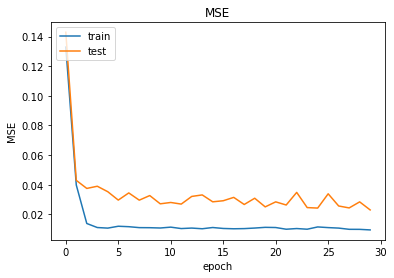

In [66]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

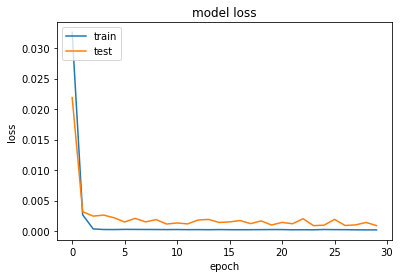

In [67]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Predicting data and visualizing its working

In [68]:
train_predict=model2.predict(x_train_data)
test_predict=model2.predict(x_test_data)

In [69]:
test_predict

array([[0.680866  ],
       [0.6870321 ],
       [0.6899255 ],
       [0.6917401 ],
       [0.6948448 ],
       [0.6948363 ],
       [0.6973183 ],
       [0.69960934],
       [0.70190996],
       [0.6982475 ],
       [0.692484  ],
       [0.6870813 ],
       [0.68386817],
       [0.67856646],
       [0.6725192 ],
       [0.6703294 ],
       [0.67021954],
       [0.666462  ],
       [0.6613116 ],
       [0.6520241 ],
       [0.64821476],
       [0.6489755 ],
       [0.64835215],
       [0.6472137 ],
       [0.64499676],
       [0.64525276],
       [0.6443186 ],
       [0.64865744],
       [0.6526196 ],
       [0.6575193 ],
       [0.6584137 ],
       [0.65826035],
       [0.65718365],
       [0.65715784],
       [0.65604484],
       [0.65866905],
       [0.6637407 ],
       [0.666365  ],
       [0.6681287 ],
       [0.67177796],
       [0.6762178 ],
       [0.6811459 ],
       [0.6842904 ],
       [0.6861862 ],
       [0.690986  ],
       [0.6935519 ],
       [0.69765824],
       [0.703

perfrom inverse scalar to get there actual values

In [70]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [71]:
real_test = scaler.inverse_transform(target_test.reshape(-1,1))
real_train = scaler.inverse_transform(target_train.reshape(-1,1))

## ploting Train result

Text(0, 0.5, 'STOCKS PRICE')

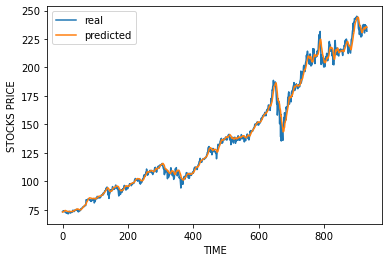

In [72]:
plt.plot(real_train)
plt.plot(train_predict)
plt.legend(['real','predicted'])
plt.xlabel('TIME')
plt.ylabel('STOCKS PRICE')

## ploting test result

Text(0, 0.5, 'STOCKS PRICE')

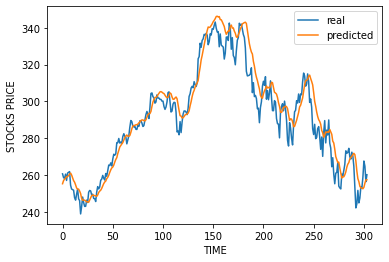

In [73]:
plt.plot(real_test)
plt.plot(test_predict)
plt.legend(['real','predicted'])
plt.xlabel('TIME')
plt.ylabel('STOCKS PRICE')

## plotting whole data together

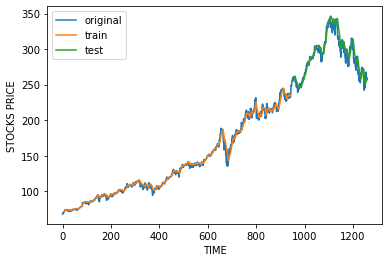

In [74]:
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['original','train','test'])
plt.xlabel('TIME')
plt.ylabel('STOCKS PRICE')
plt.show()

### errors

mean square error

In [75]:
mse = mean_squared_error(real_test,test_predict,squared=False)
mse

8.289205736035132

root mean squared error

In [76]:
rmse=math.sqrt(mse)
rmse

2.8790980768350236

Mean Absolute Percentage Error

In [77]:
mean_absolute_percentage_error(real_test,test_predict)

0.021793783395103142

## Predicting future values recursively after training data'

[0.6058117]
11


Text(0.5, 1.0, 'prediction')

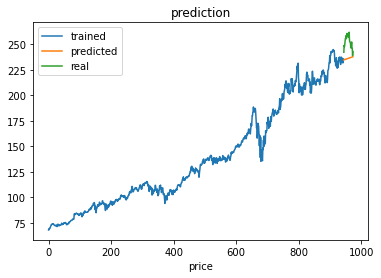

In [80]:
x_input=train_data[933:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model2.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
sizee=train_data.shape

he=np.arange(944,974,1)
ze=np.arange(0,943)

plt.plot(ze,scaler.inverse_transform(train_data))
plt.plot(he,scaler.inverse_transform(lst_output))
plt.plot(he,scaler.inverse_transform(test_data[0:30]))
plt.legend(['trained','predicted','real'])
plt.xlabel('time')
plt.xlabel('price')
plt.title('prediction')